<h1> <strong> <center> Data Science Project - Group 6 </center> </strong> </h1>

In [37]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
file_path = "Survey Responses.csv"
df = pd.read_csv(file_path)
df.head(3)

,Timestamp,University,Intended/Current Major,Plans after degree,Age,Gender,Household Monthly Expenses,Financial Assistance,"Technical (yes=1, no=0)"
0,10/21/2024 17:28:47,LUMS,Computer Science,Partially Employed (Academics with part time e...,21,Male,"Between 550,000 - 700,000",NaN,1
1,10/21/2024 22:04:49,LUMS,Computer Science,Further Education (Masters/PhD) with a plan to...,21,Male,"Between 200,000 - 300,000",No,1
2,10/21/2024 22:42:32,LUMS,Computer Science,Employment (Full time Job),21,Female,"Between 200,000 - 300,000",No,1


In [39]:
print(df.columns)

Index(['Timestamp', 'University', 'Intended/Current Major',
       'Plans after degree', 'Age', 'Gender', 'Household Monthly Expenses',
       'Financial Assistance', 'Technical (yes=1, no=0)'],
      dtype='object')


Here is a description of what each of the columns in the dataset represent:

1. **Timestamp**: The exact timestamp when the respondent submitted the survey.

2. **University**: The name of the university the respondent is enrolled with.

3. **Intended/Current Major**: The respondent's current or intended major field of study.

4. **Plans after degree**: The respondent's plans after completing their degree, such as employment, further education, or self-employment.

5. **Age**: The respondent's age at the time of the survey.

6. **Gender**: The respondent's gender.

7. **Household Monthly Expenses**: The range of the respondent's household monthly expenses, provided as categorical ranges.

8. **Financial Assistance**: Whether the respondent is receiving financial assistance. Values are `Yes`, `No`, or missing if unspecified.

9. **Technical (yes=1, no=0)**: Indicates if the respondent's major is technical (e.g., engineering, computer science). `1` for technical and `0` for non-technical.

We begin with cleaning the dataset. <br> <br>
1) Firstly, we don't need the 'Timestamp' column since it has no relation with the output variable.

In [40]:
df = df.drop(columns=['Timestamp'])

2) Next, we will convert all column names to lower case letters and replace any non-trailing spaces with underscores (_)

In [41]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

3) Next, we will rename certain columns to make them easier to use in subsequent data analysis:
- Replace `intended/current_major`  with `major`
- Replace `household_monthly_expenses` with `expenses`
- Replace `plans_after_degree` with `plans`
- Replace `financial_assistance` with `finaid`
- Replace `technical (yes=1, no=0)` with `technical_major`

In [42]:
df = df.rename(columns={
    'intended/current_major': 'major',
    'household_monthly_expenses': 'expenses',
    'plans_after_degree': 'plans',
    'financial_assistance': 'finaid',
    'technical_(yes=1,_no=0)': 'technical_major'
})
print(df.columns)

Index(['university', 'major', 'plans', 'age', 'gender', 'expenses', 'finaid',
       'technical_major'],
      dtype='object')


4) We will now replace the rows of the 'gender' column with numerical quantities.
- Replace Male with 0
- Replace Female with 1

In [43]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df.head(3)

,university,major,plans,age,gender,expenses,finaid,technical_major
0,LUMS,Computer Science,Partially Employed (Academics with part time e...,21,0,"Between 550,000 - 700,000",NaN,1
1,LUMS,Computer Science,Further Education (Masters/PhD) with a plan to...,21,0,"Between 200,000 - 300,000",No,1
2,LUMS,Computer Science,Employment (Full time Job),21,1,"Between 200,000 - 300,000",No,1


5) We now move on to handling missing values. We will drop any row that has a missing value for any column.

In [44]:
missing_values_count = df.isnull().sum()
print("Missing values per column:\n", missing_values_count)
df = df.dropna()

Missing values per column:
 university         0
major              0
plans              0
age                0
gender             0
expenses           0
finaid             1
technical_major    0
dtype: int64


6) Since the finaid column also contains binary variables (yes/no), we can encode it using 0s and 1s.

In [45]:
df['finaid'] = df['finaid'].map({'Yes': 1, 'No': 0})
print(df['finaid'].unique())
df.head(3)

[0 1]


,university,major,plans,age,gender,expenses,finaid,technical_major
1,LUMS,Computer Science,Further Education (Masters/PhD) with a plan to...,21,0,"Between 200,000 - 300,000",0,1
2,LUMS,Computer Science,Employment (Full time Job),21,1,"Between 200,000 - 300,000",0,1
3,LUMS,Accounting and Finance,Further Education (Masters/PhD) with a plan to...,20,1,"Between 300,000 - 400,000",1,1


7) As we can see, some of the rows of the `major` and `plan` columns are very long (eg: Comparative Literature and Creative Arts (CLCS/CLCA)). So, we will use acronyms or shorter versions to represent them. This is to ease visualization of graphs later.

In [46]:
major_mapping = {
    'Computer Science': 'CS',
    'Accounting and Finance': 'ACF',
    'Computer Engineering': 'CE',
    'Management Sciences': 'MGMT',
    'Communication and Design': 'C&D',
    'Economics': 'Econ',
    'Economics and Mathematics (Joint)': 'Econ & Math',
    'Anthropology / Sociology': 'Anthro/Socio',
    'Electrical Engineering': 'EE',
    'Political Science': 'Pol Sci',
    'Business Administration': 'Business',
    'Biology': 'Bio',
    'Architecture': 'Architecture',
    'Comparative Literature and Creative Arts (CLCS/CLCA)' : 'CLCS/CLCA',
    'Artificial Intelligence': 'AI',
    'History': 'History',
    'Mechanical Engineering': 'ME',
    'Economics and Political Sciences (Joint)': 'Econ & Pol'
}
df['major'] = df['major'].replace(major_mapping)


plan_mapping = {
    'Partially Employed (Academics with part time employment)': 'Partially Employed + Academic',
    'Self-Employed (Business, Startup etc.)': 'Self Employed',
    'Further Education (Masters/PhD) with a plan to enter the industry' :'Further Education + Industry',
    'Further Education (Masters/PhD) with a plan to enter academia (research/teaching)' :'Further Education + Academia',
    'Employment (Full time Job)': 'Full time Employment'
}
df['plans'] = df['plans'].replace(plan_mapping)


8) Next, we will clean the `expenses` columns. We will remove the 'Between', 'Less than' and 'Above' words and use dashes (-), minus sign or plus sign (+) to convey the same meaning.

In [47]:
def clean_expenses(expenses):
    if isinstance(expenses, str):
        expenses = expenses.replace('Less than', '').replace('Above', '').strip()
        expenses = expenses.replace('Between', '').replace('-', ' ').replace(',', '')
        
        if '100000' in expenses:
            return '100000-'
        elif '200000' in expenses:
            return '200000-300000'
        elif '300000' in expenses:
            return '300000-400000'
        elif '400000' in expenses:
            return '400000-500000'
        elif '500000' in expenses:
            return '500000-600000'
        elif '600000' in expenses:
            return '600000-700000'
        elif '700000' in expenses:
            return '700000-800000'
        elif '800000' in expenses:
            return '800000+'
    return expenses

df['expenses'] = df['expenses'].apply(clean_expenses)

<h2> <strong> <center> Visualization </center> </strong> </h2> <br> <br>
Now that we are done with the data cleaning part, we will visualize the relationships between the data to extract meaningful conclusions.

<Figure size 2000x1200 with 0 Axes>

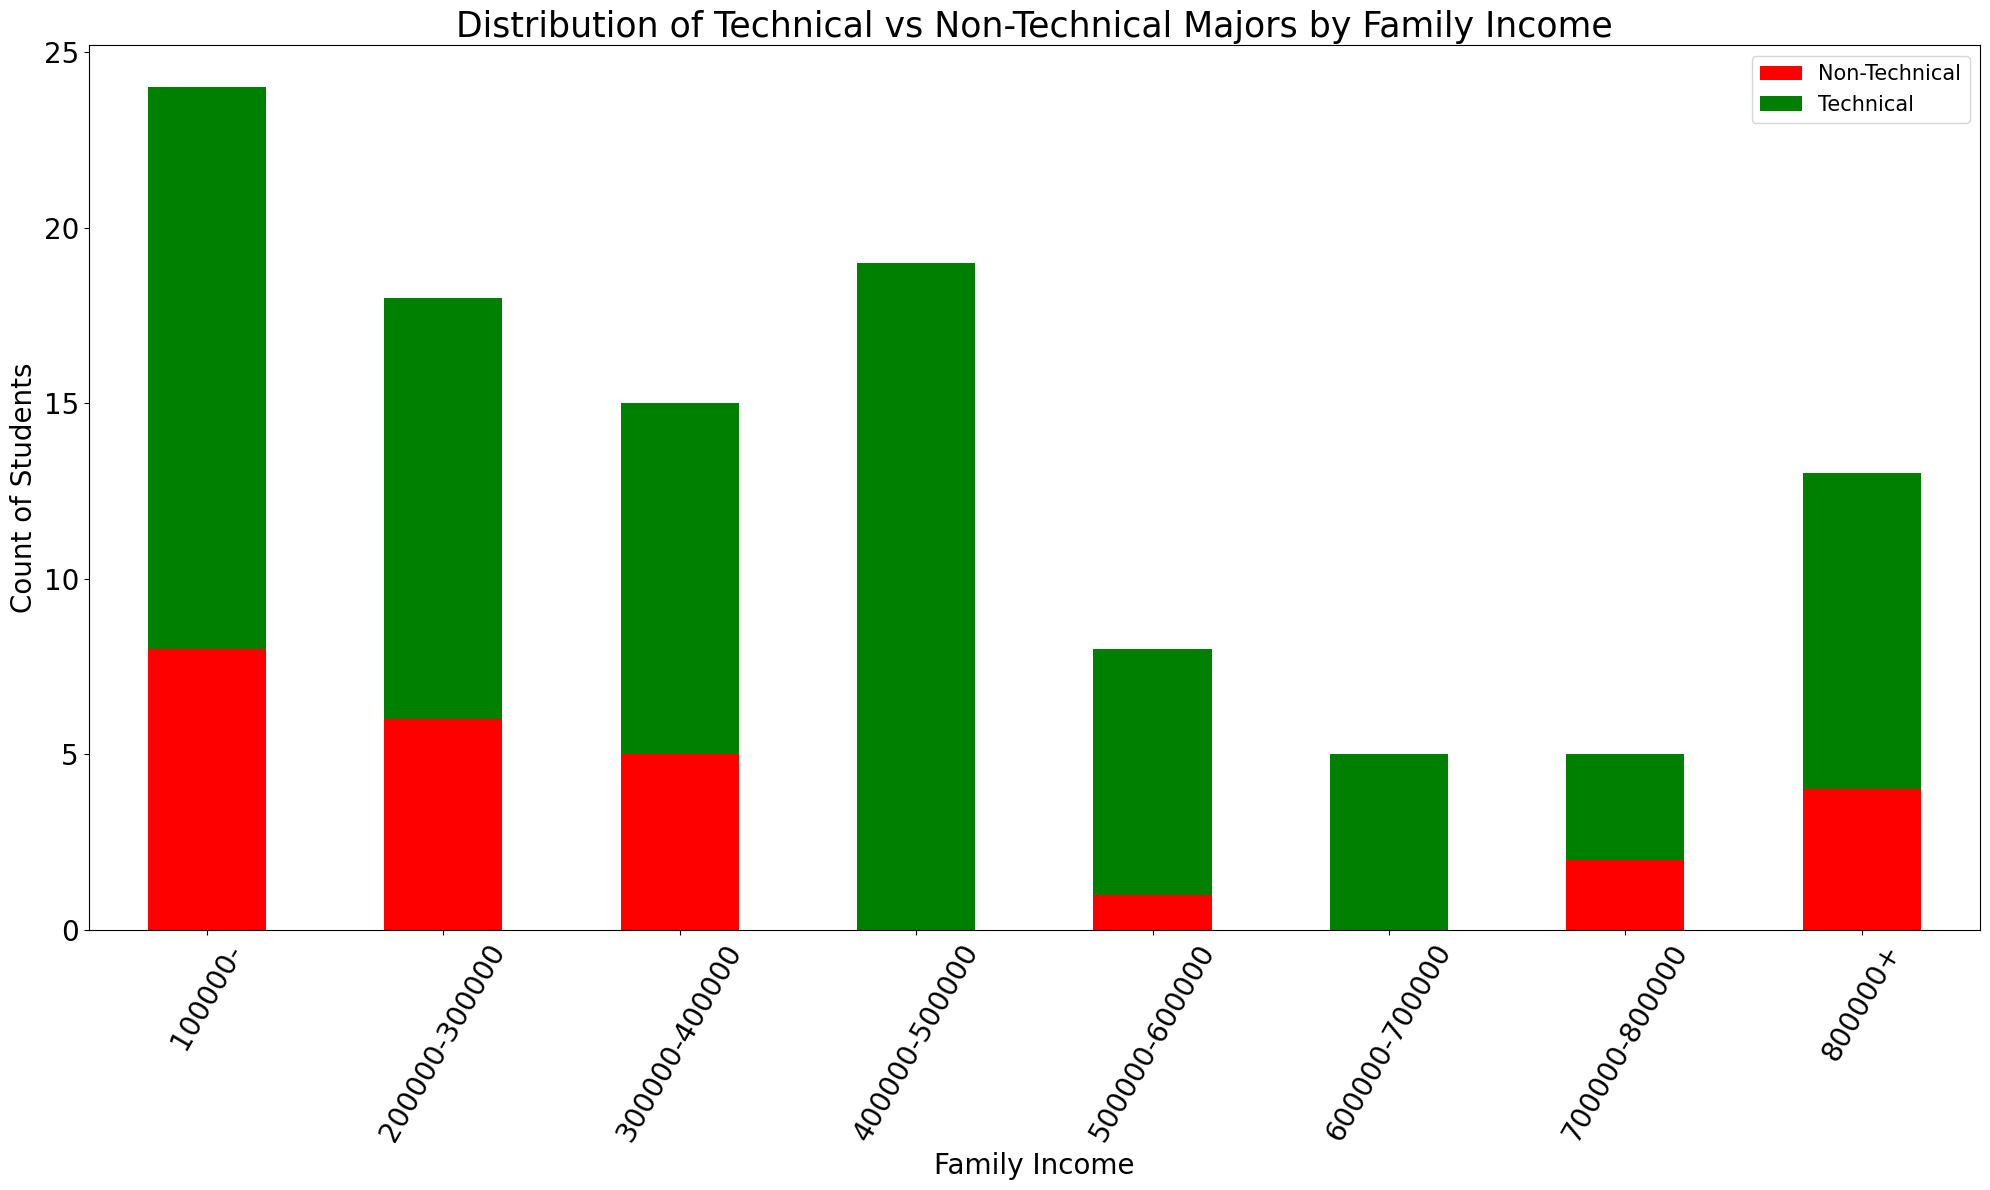

In [48]:
df['technical_major'] = df['technical_major'].astype(int)
income_major_counts = df.groupby(['expenses', 'technical_major']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 12))
income_major_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(20, 12))

plt.title('Distribution of Technical vs Non-Technical Majors by Family Income', fontsize=25)
plt.xlabel('Family Income', fontsize=20)
plt.ylabel('Count of Students', fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['Non-Technical', 'Technical'], fontsize=15)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

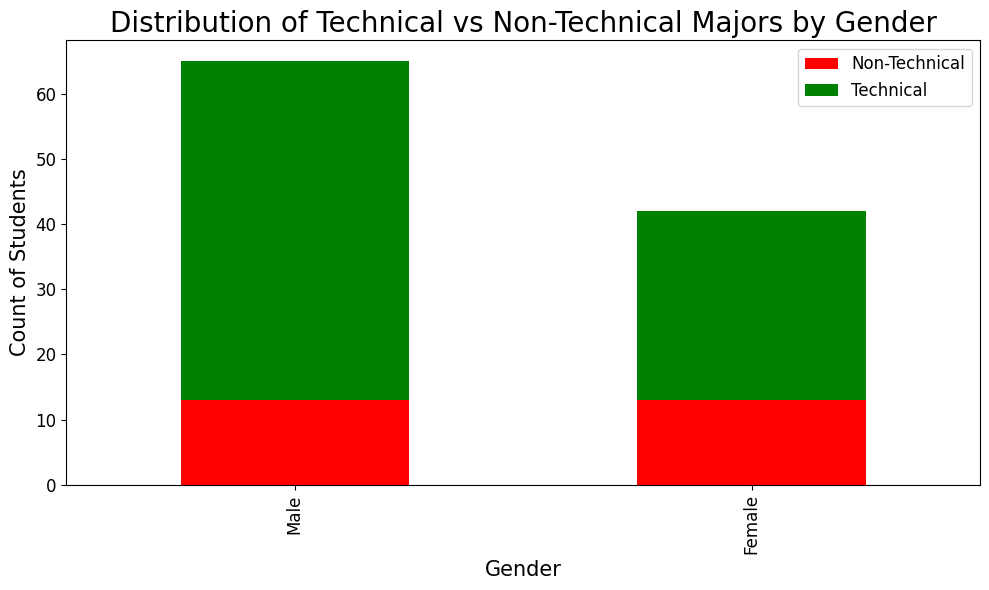

In [49]:
df['technical_major'] = df['technical_major'].astype(int)

# Group by 'gender' and 'technical_major', then count occurrences
gender_major_counts = df.groupby(['gender', 'technical_major']).size().unstack(fill_value=0)

# Plot a stacked bar plot
plt.figure(figsize=(10, 6))
gender_major_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))

plt.title("Distribution of Technical vs Non-Technical Majors by Gender", fontsize=20)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count of Students", fontsize=15)
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)  # Male = 0, Female = 1
plt.yticks(fontsize=12)
plt.legend(['Non-Technical', 'Technical'], fontsize=12)
plt.tight_layout()

plt.show()


<Figure size 1400x800 with 0 Axes>

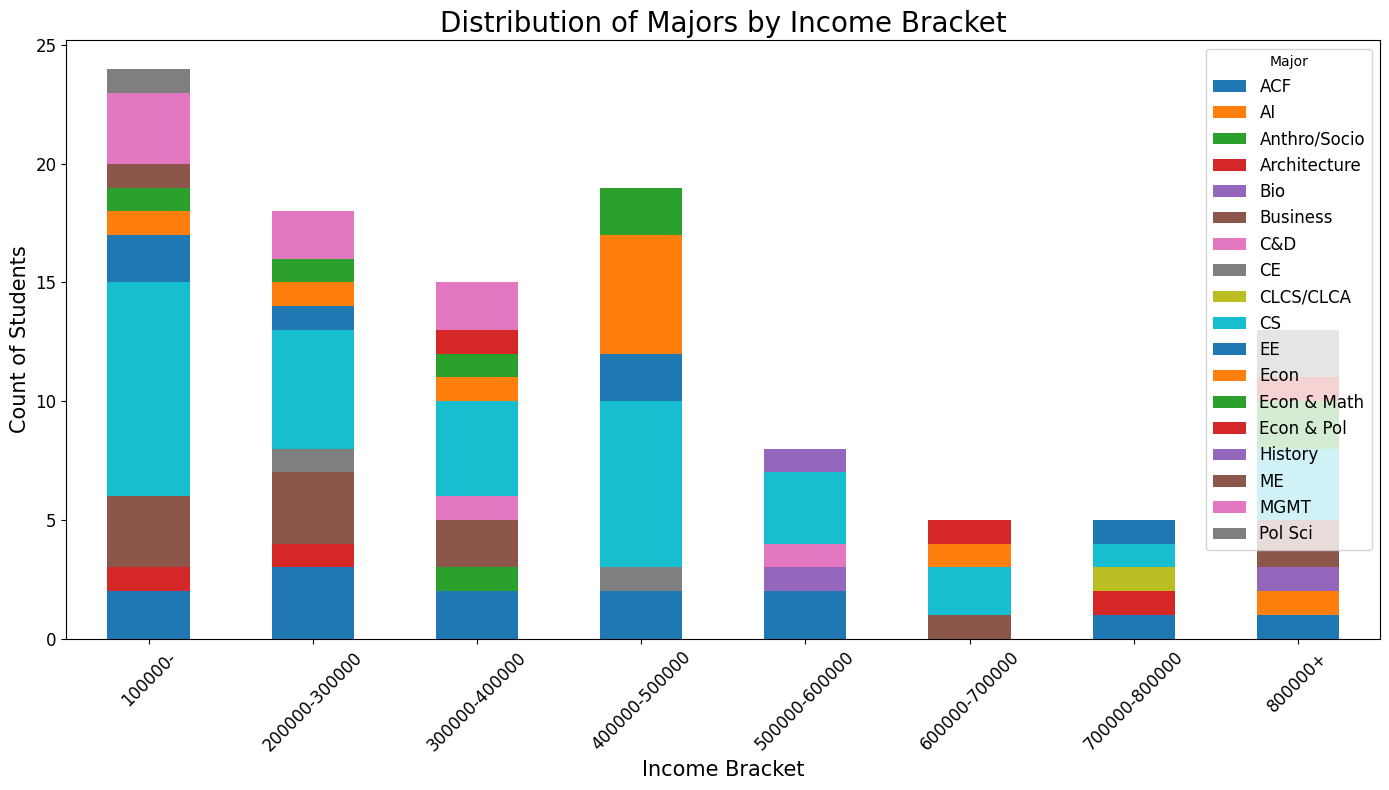

In [50]:
income_major_counts = df.groupby(['expenses', 'major']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
income_major_counts.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title("Distribution of Majors by Income Bracket", fontsize=20)
plt.xlabel("Income Bracket", fontsize=15)
plt.ylabel("Count of Students", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Major', fontsize=12)
plt.tight_layout()
plt.show()

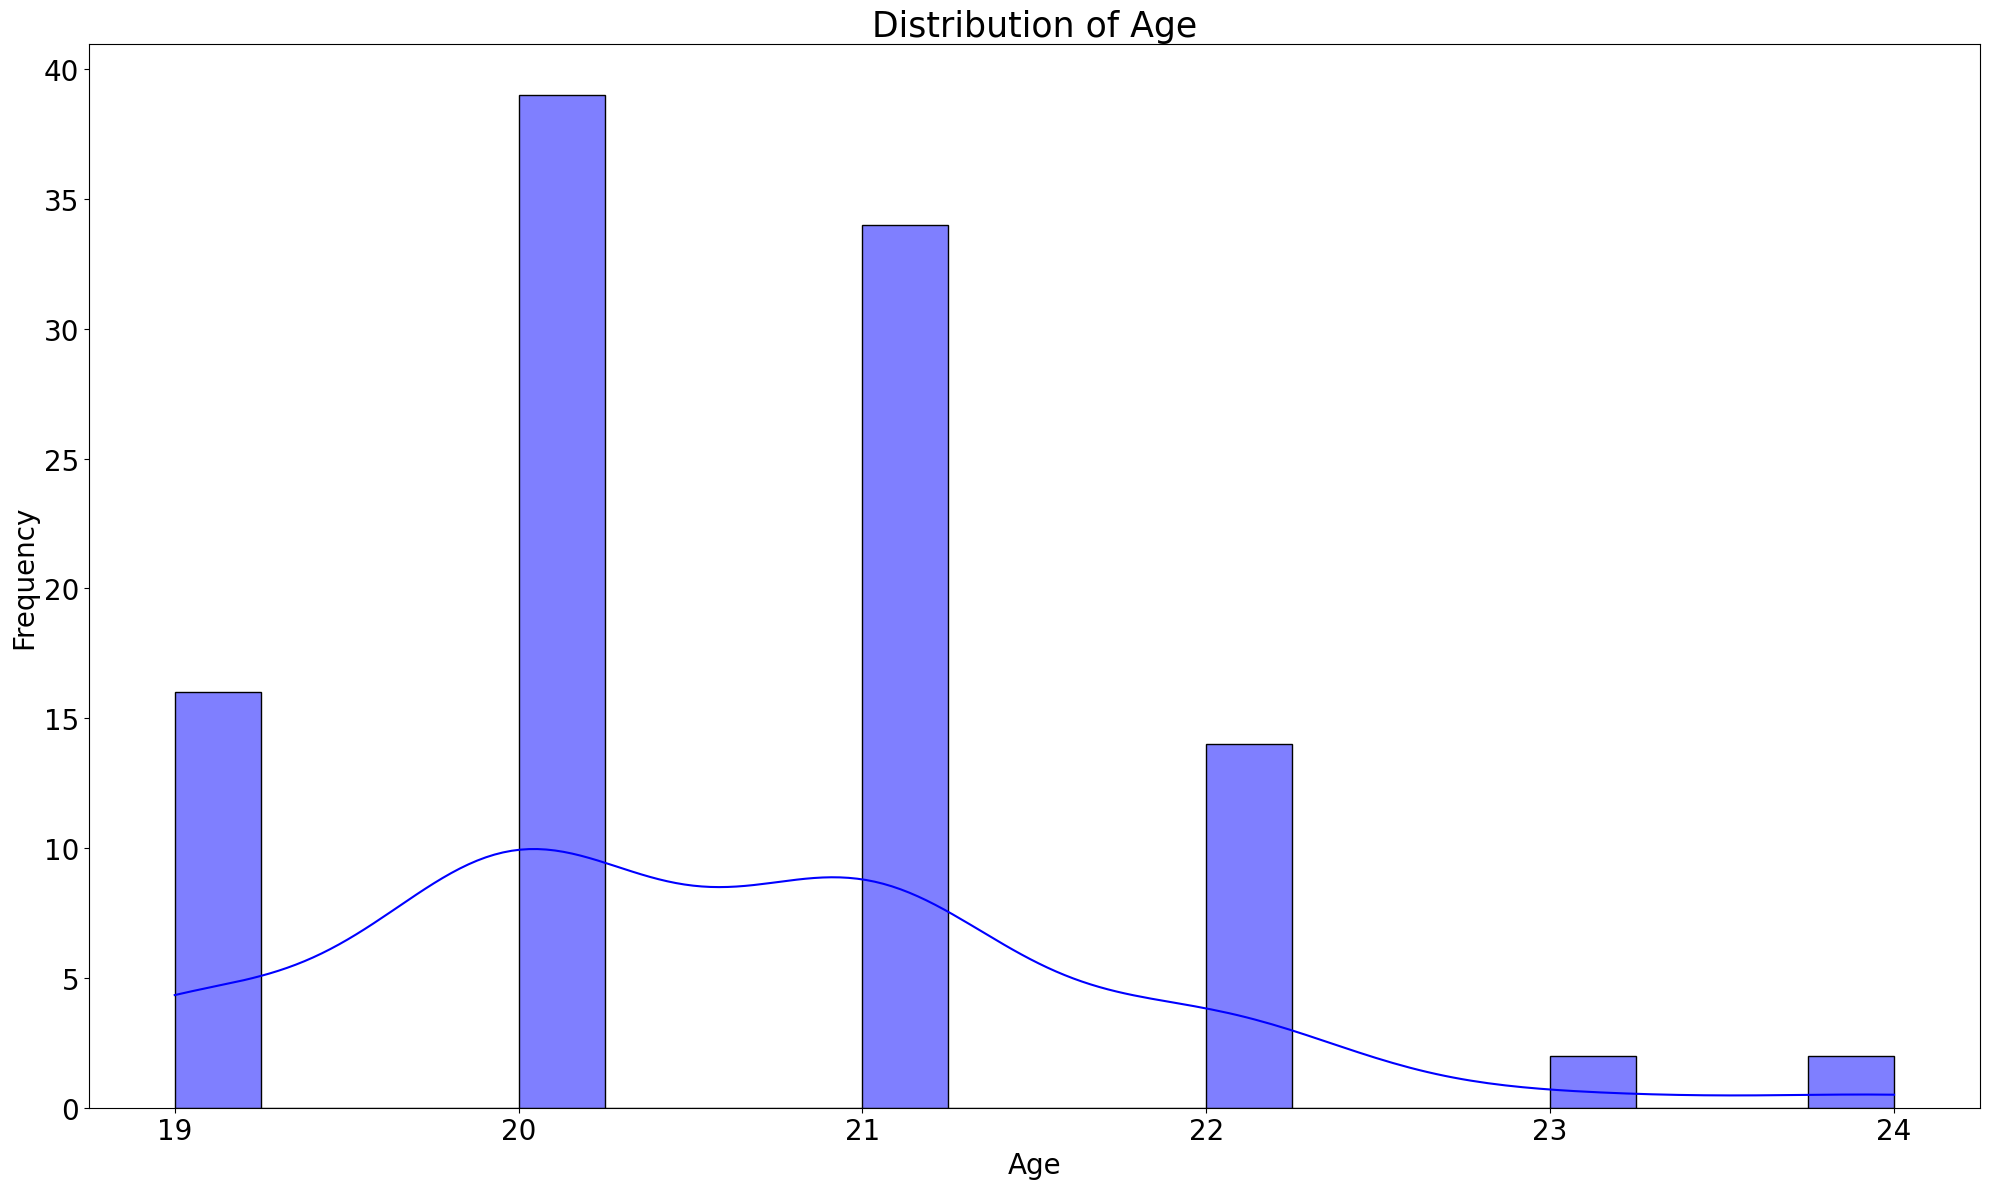

/var/folders/5l/z_f8vl_56236dtty6zj589g00000gn/T/ipykernel_4478/3064878834.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x='major', palette='viridis')


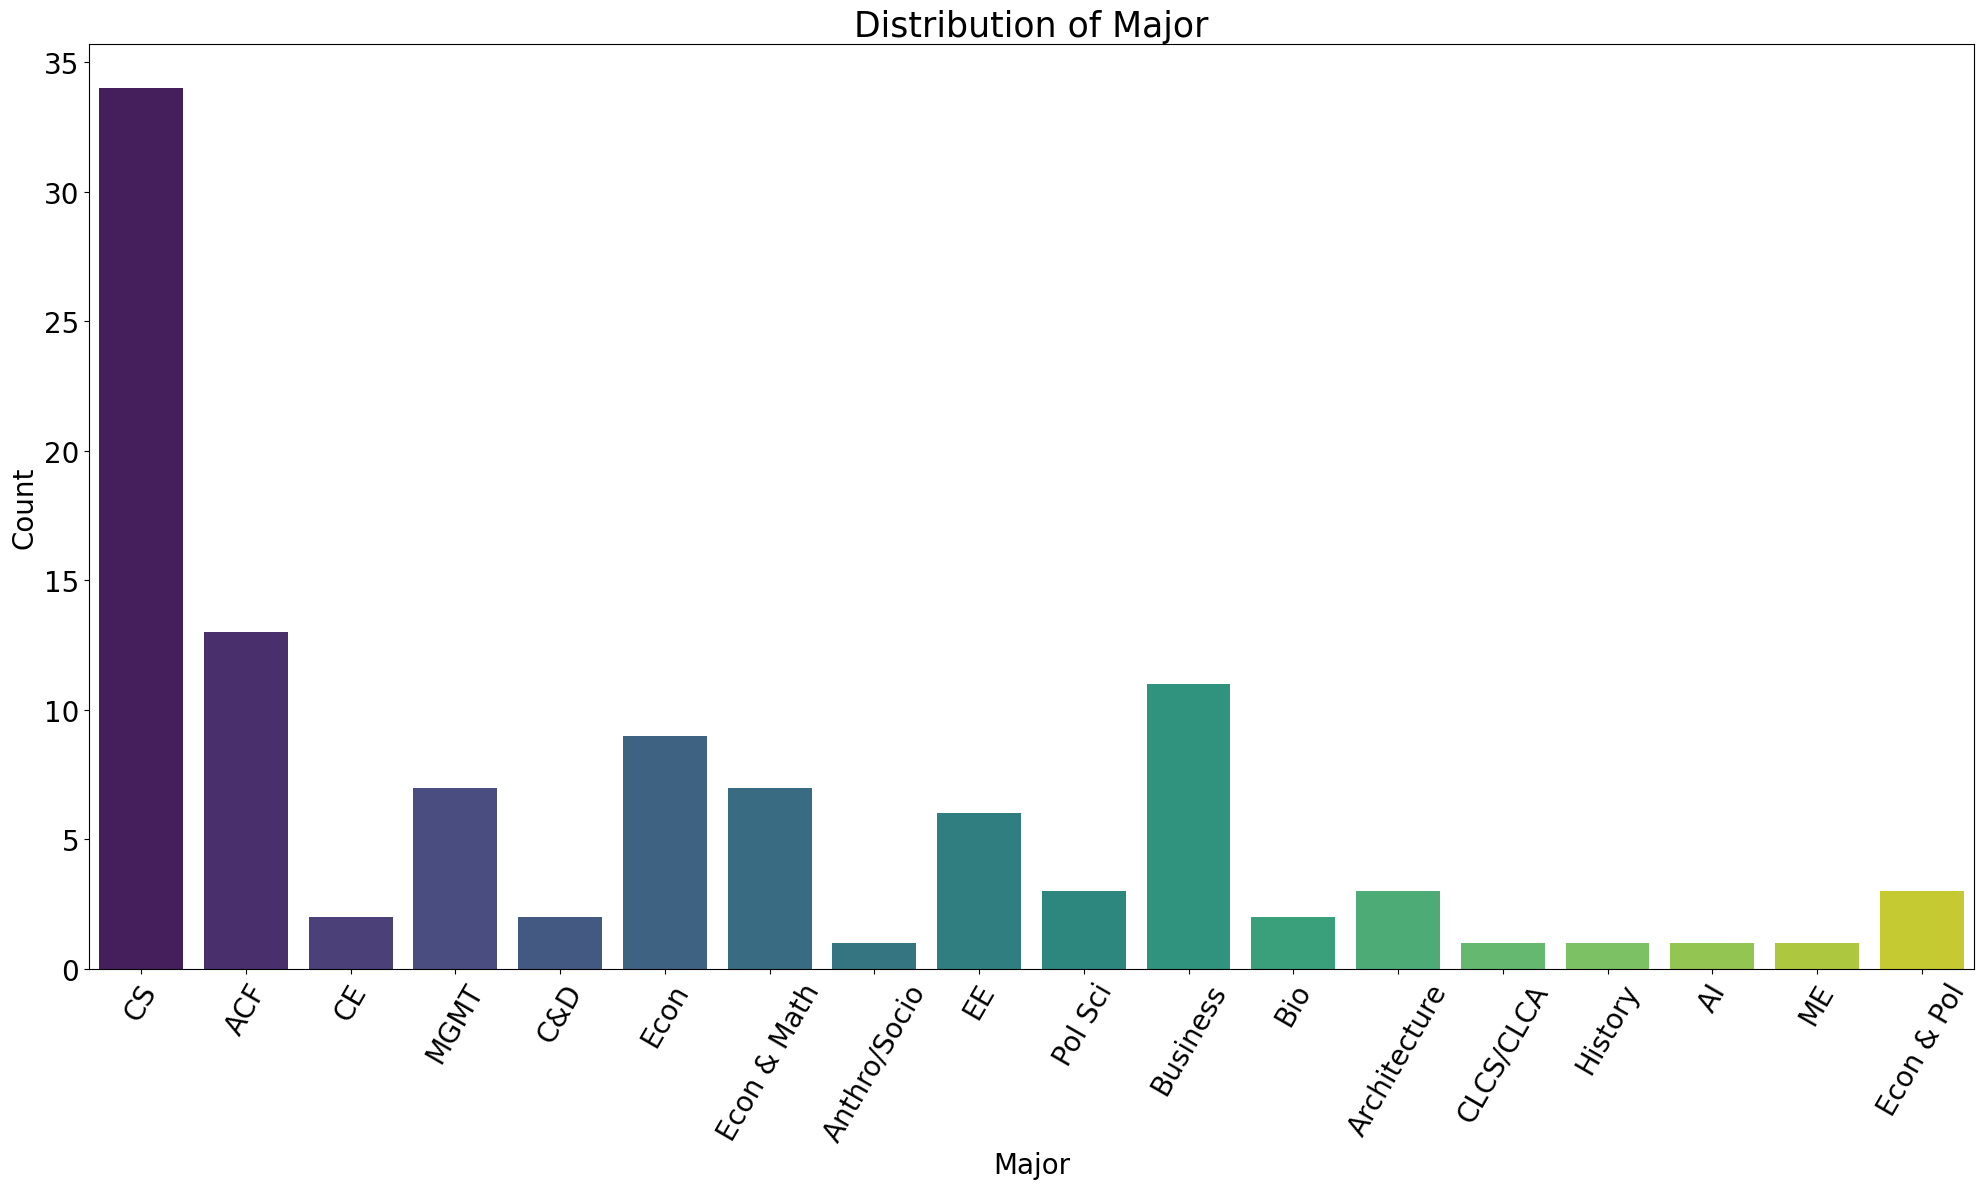

/var/folders/5l/z_f8vl_56236dtty6zj589g00000gn/T/ipykernel_4478/3064878834.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x='expenses', palette='viridis', order=expense_order)


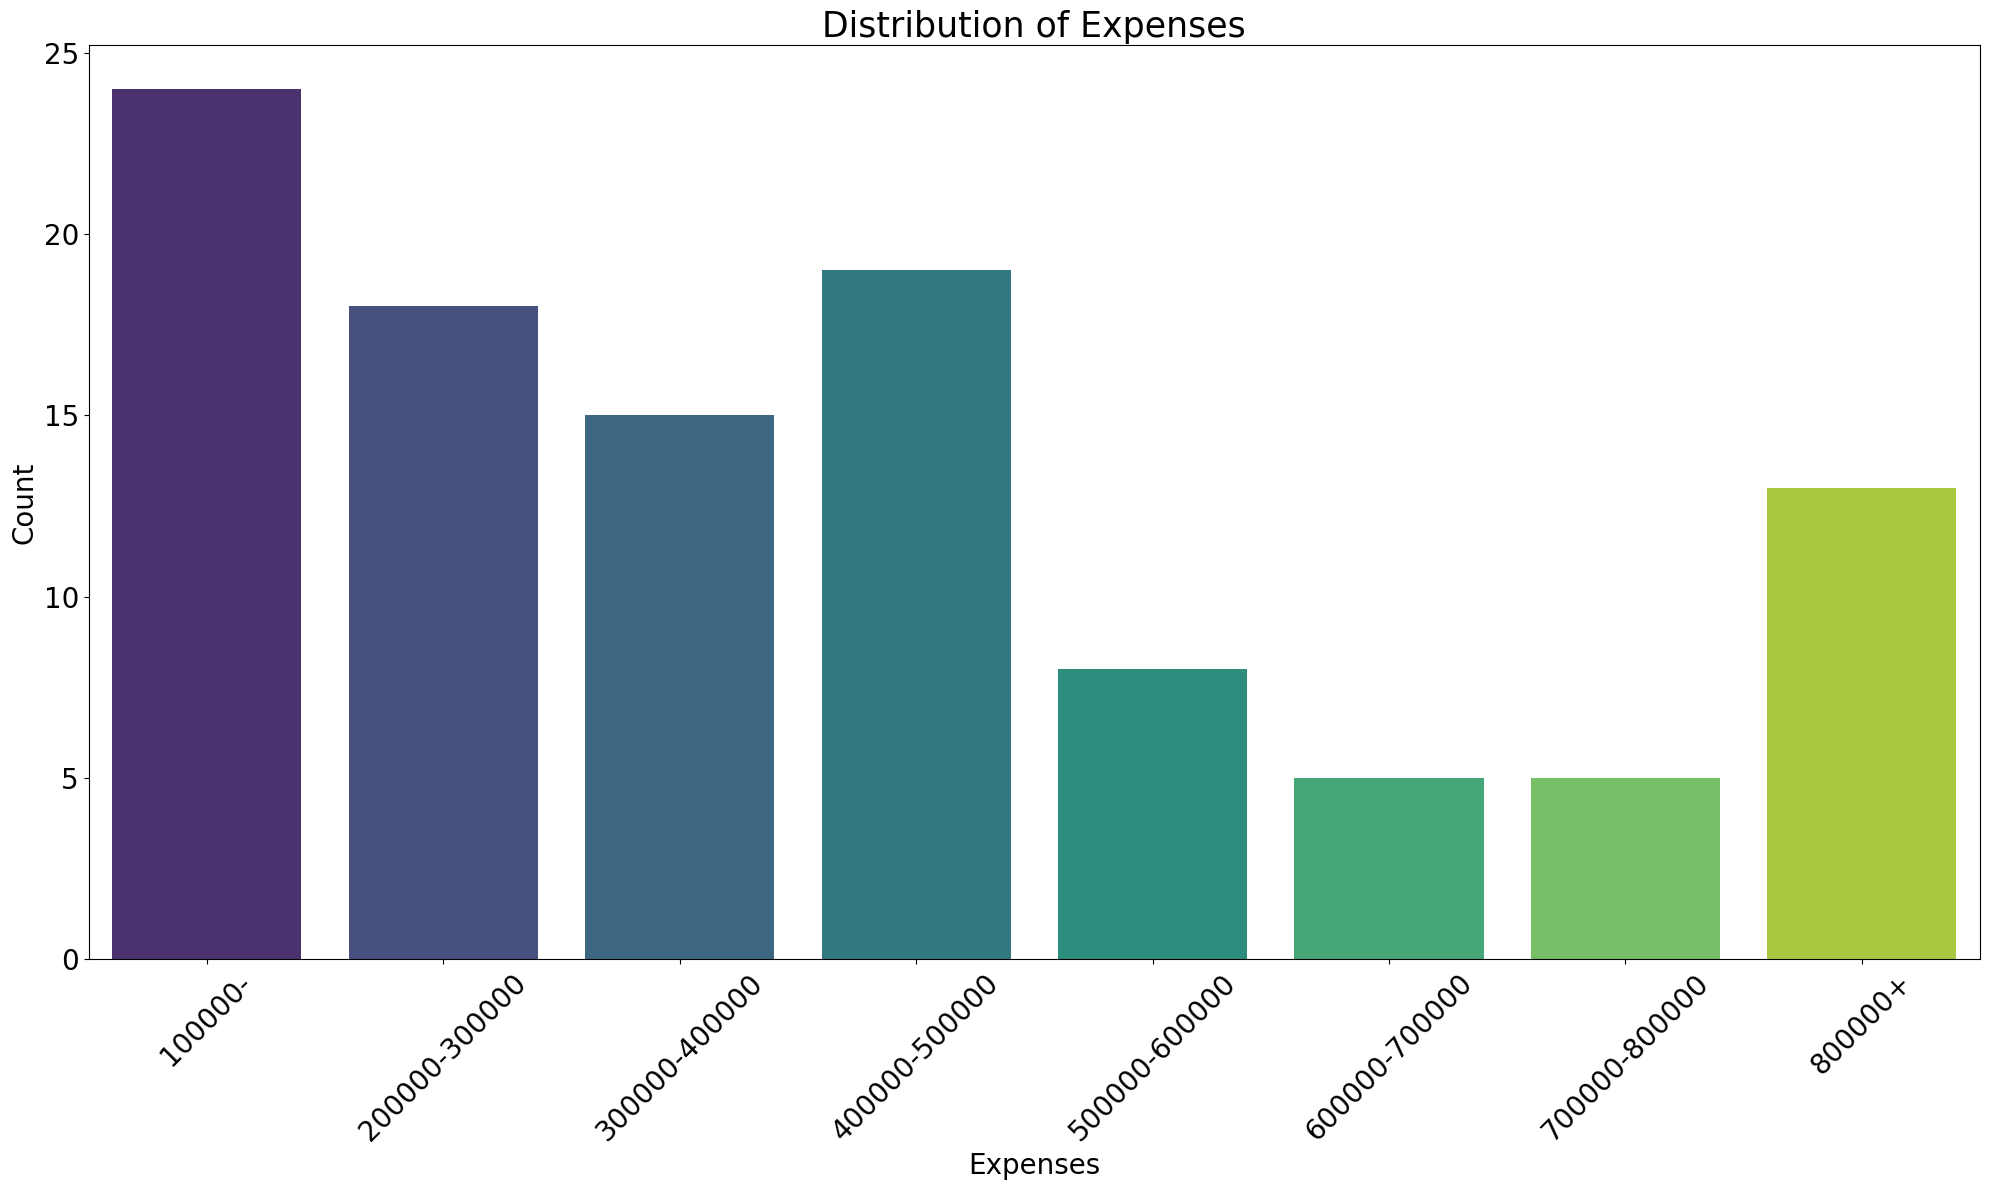

/var/folders/5l/z_f8vl_56236dtty6zj589g00000gn/T/ipykernel_4478/3064878834.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x='plans', palette='viridis')


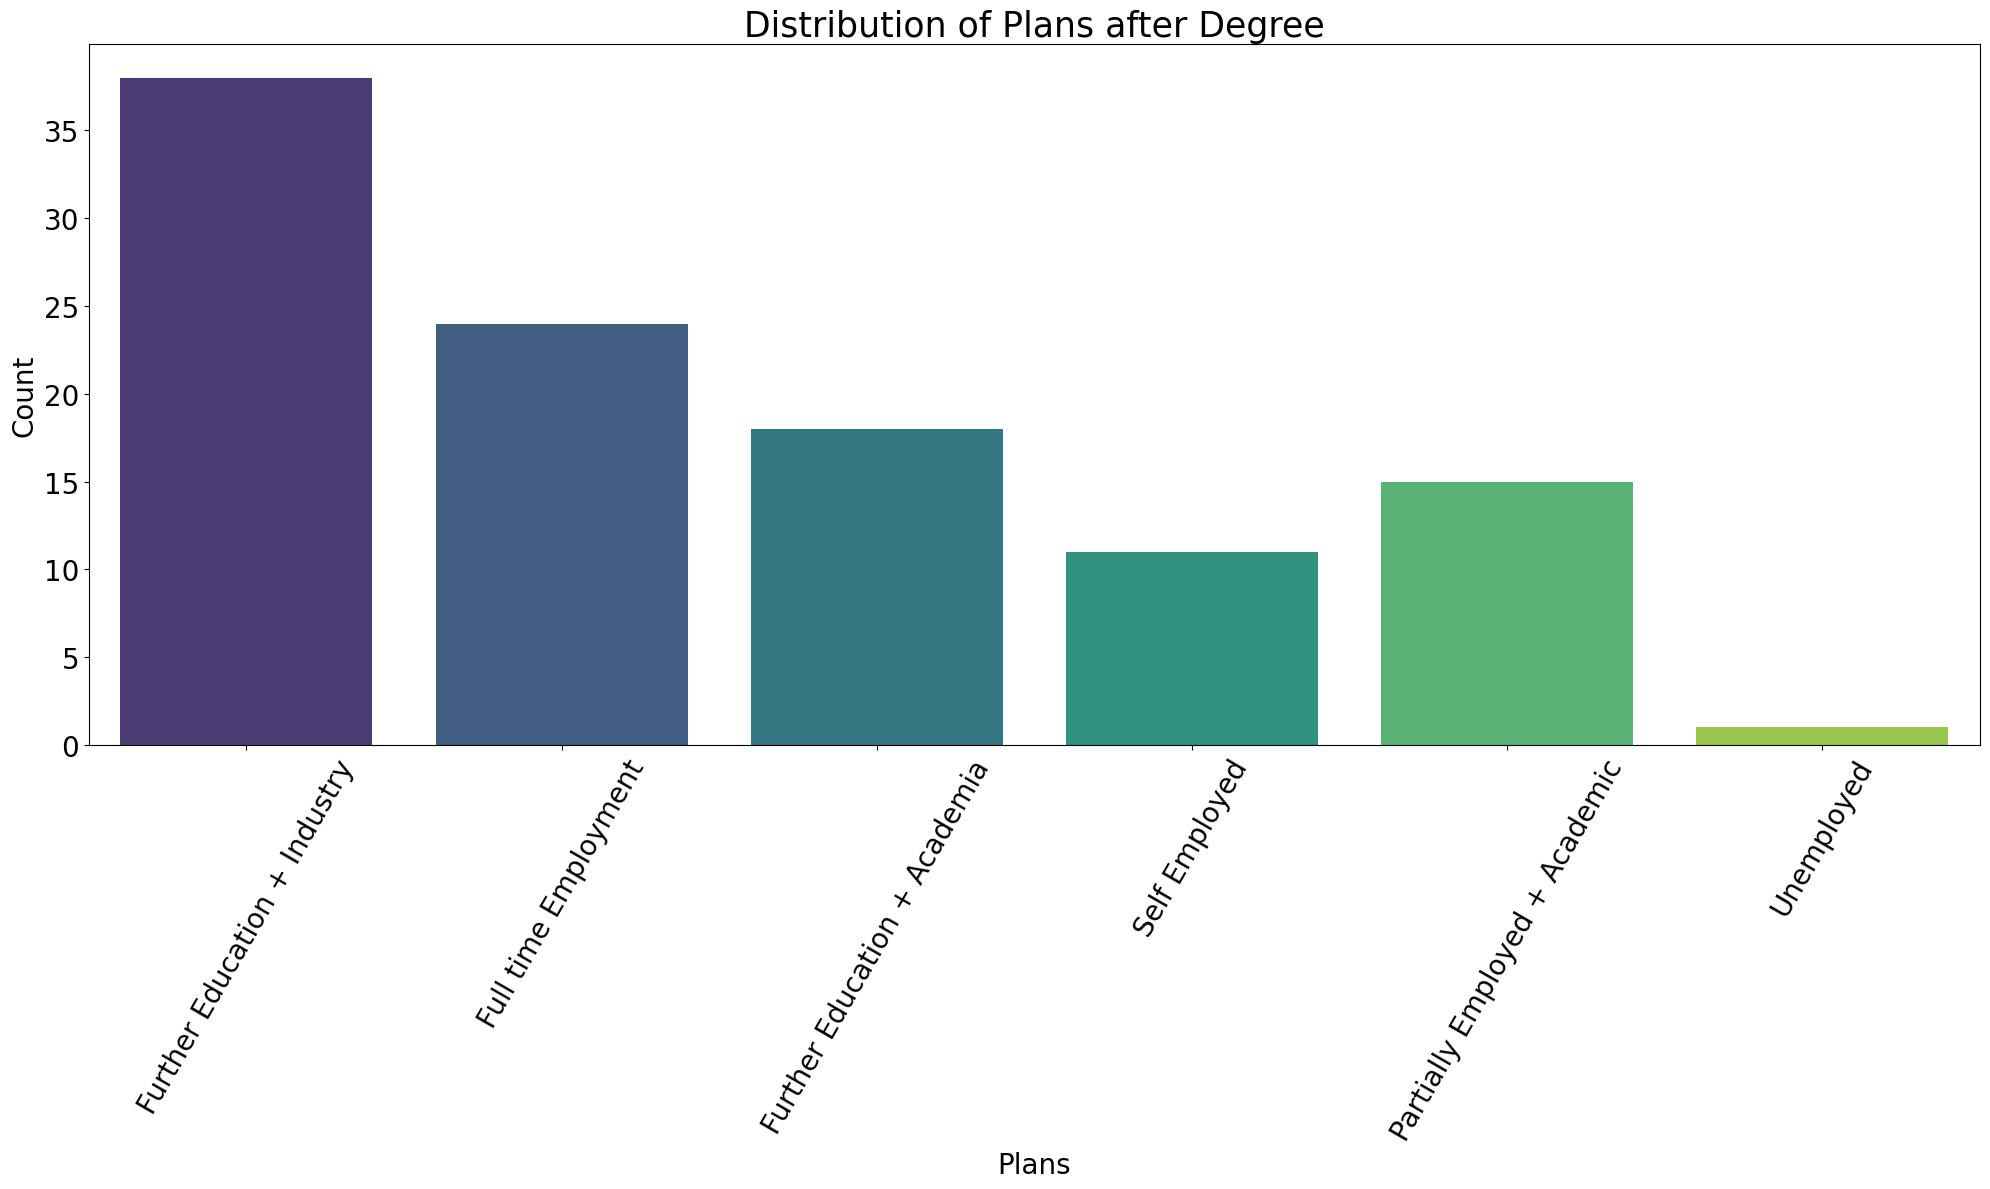

In [51]:
temp_df = df.copy()

plt.figure(figsize=(20, 12))  
sns.histplot(temp_df['age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Age', fontsize=25)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout() 
plt.show()

plt.figure(figsize=(20, 12))  
sns.countplot(data=temp_df, x='major', palette='viridis')
plt.title('Distribution of Major', fontsize=25)
plt.xlabel('Major', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout() 
plt.show()

expense_order = sorted(temp_df['expenses'].unique(), key=lambda x: str(x))

plt.figure(figsize=(20, 12))  
sns.countplot(data=temp_df, x='expenses', palette='viridis', order=expense_order)
plt.title('Distribution of Expenses', fontsize=25)
plt.xlabel('Expenses', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout() 
plt.show()

plt.figure(figsize=(20, 12))  
sns.countplot(data=temp_df, x='plans', palette='viridis')
plt.title('Distribution of Plans after Degree', fontsize=25)
plt.xlabel('Plans', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout() 
plt.show()


9) We will now find all the unique values associated with the `plans` column and and replace each with a number (starting from 0 and so on). For example `Self-Employed (Business, Startup etc.)` might be replaced with `2` and so on.

In [52]:
data = df.copy()

df['plans'], unique_plans = pd.factorize(df['plans'])
print("Unique values in 'plans' after factorizing:", df['plans'].unique())

df['expenses'], unique_expenses = pd.factorize(df['expenses'])
print("Unique values in 'expenses' after factorizing:", df['expenses'].unique())

df['university'], unique_universities = pd.factorize(df['university'])
print("Unique values in 'university' after factorizing:", df['university'].unique())

df['major'], unique_majors = pd.factorize(df['major'])
print("Unique values in 'major' after factorizing:", df['major'].unique())

df.head(3)


Unique values in 'plans' after factorizing: [0 1 2 3 4 5]
Unique values in 'expenses' after factorizing: [0 1 2 3 4 5 6 7]
Unique values in 'university' after factorizing: [0 1 2 3 4 5]
Unique values in 'major' after factorizing: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


,university,major,plans,age,gender,expenses,finaid,technical_major
1,0,0,0,21,0,0,0,1
2,0,0,1,21,1,0,0,1
3,0,1,0,20,1,1,1,1


<Axes: >

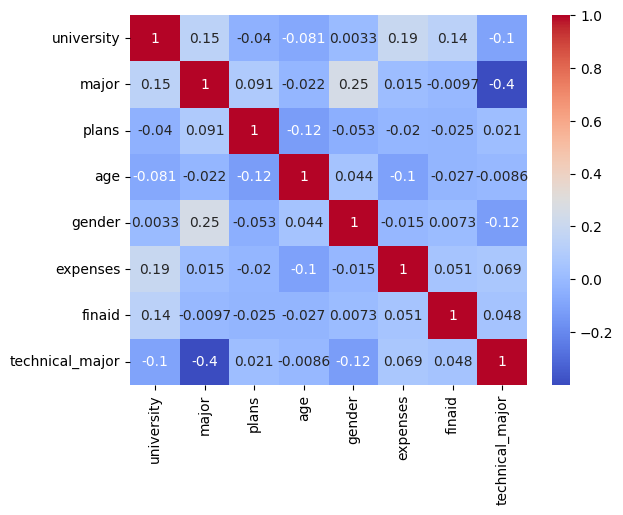

In [53]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<h2> <strong> <center> Machine Learning: Logistic Regression </center> </strong> </h2> <br> 
We will now implemnent a Logistic Regression classifier to predict whether a person opts for a techincal major based on the given features. 

1) First we perform one-hot encoding on categorical variables

In [54]:
categorical_columns = [
    col for col in data.columns 
    if data[col].dtype == 'object' and col != 'age'
]

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

X = data_encoded.drop(columns=["technical_major"])
y = data_encoded["technical_major"]

2) Next we split the data into training and testing datasets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)
y_predicted = LR.predict(X_test)

3) Here, we test our model on the test dataset and assess its performance using the following metrics:
- Accuracy
- Class-wise Precision
- Class-wise Recall
- Macro F1 Score
- Confusion Matrix

In [56]:
def make_heat_map(confusion_matrix, title):
  plt.figure(figsize=(12, 6))
  sns.heatmap(confusion_matrix, fmt="d", annot= True, cmap= "Blues", cbar= True)
  plt.title(title)
  plt.xlabel("True Label")
  plt.ylabel("Predicted Label")
  plt.show()

def evaluate(y_actual, y_predicted, class_labels):
    accuracy = accuracy_score(y_actual, y_predicted)
    print(f"Accuracy: {accuracy * 100:.2f}%\n")
    
    print("Classification Report:")
    print(classification_report(y_actual, y_predicted, target_names=list(map(str, class_labels))))
    
    cm = confusion_matrix(y_actual, y_predicted, labels=class_labels)
    make_heat_map(cm, "Confusion Matrix")

Accuracy: 90.91%

Classification Report:
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           0       1.00      0.88      0.93         8

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11



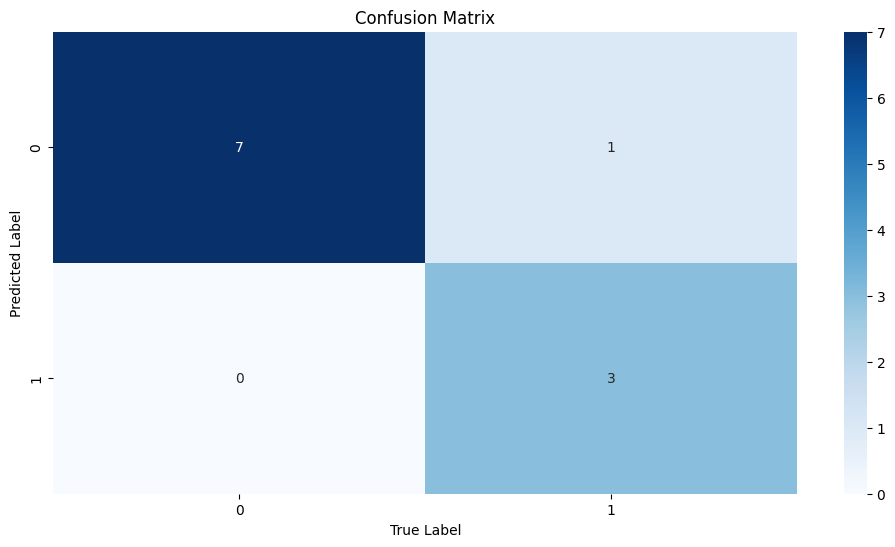

In [57]:
class_labels = data_encoded["technical_major"].unique()
evaluate(y_test, y_predicted, class_labels)